# Chapter 3: Polynomial Regression excercise

In [1]:
%reset
low_memory=False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

## 3.1 Introduction & Motivation

While linear regression in itself is an interesting tool, it can only bring us so far. At a certain point data will no longer have a linear connection and we will have to resort to using **polynomial regression**. Using an example regarding cars we will compare both forms of regression and try to end up with the best model possible.

## 3.2 Problem setting

Every car has a certain distance it can drive per unit of fuel. In the industry, this is measured in **MPG** (or Miles Per Gallon). The higher the MPG, the more fuel-efficient a certain car is. Generally speaking we want a high MPG to save money on fuel cost.

## 3.3 Model

Go to canvas and donload the file "Auto.csv" from module 3. This data contains the required dataset.

In [97]:
df = pd.read_csv("Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


##### Question 1: Have a look at the data. Can you spot a column we will not be able to use? Why is this? Can you think of a way to transform this type of data so we could use it after all? Would work for the data we currently have? Elaborate.

Polynomial regression won't work with text. We could theoretically convert each string into integers to assign a value. These values could then be used by the model. However, since each car name is unique and has no real connection to its preformance, this likely would not result in a better model.

What could potentially result in a better model would be the brand name of a car. This because certain brands could create more efficient cars, meaning a car of brand A would be more likely to have a high MPG than a car of brand B.

##### Question 2: Drop the extra column. Create a train_test split from the remaining data. Make sure **not** to include the final mpg colum in your "X" dataset!

In [98]:
df = df.drop(['car name'], axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [99]:

X = df.drop(['mpg'], axis=1)  
y = df['mpg']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)


(298, 7)
(100, 7)


Since we are working with a lot of variables, it is time to plot a heatmap.

<Axes: >

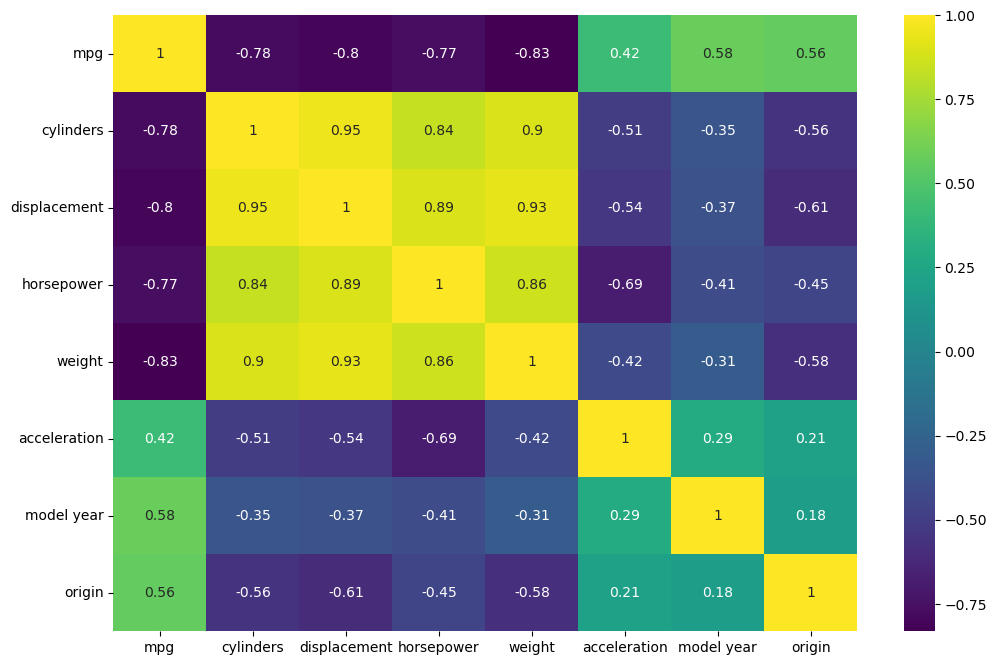

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

##### Question 3: Explore the heatmap. Which variables would you expect to be useful when trying to predict MPG?

##### Question 4: Plot the data using "weight" as the independant variable. Fit a model using linear regression. Calculate $R^2$ and the MSE. Is this any good? Show the model on a plot and elaborate.

## Answer 3

if someone try to predict MPG according to heatmap. There are 5 variables would be useful such as cylinders, displacement,horsepower, weight and acceleration. Because those are strongly related to the performance of the engine.
#### weight (-0.83):
this has a negative and strong correlation with the mpg. Lower fuel efficiency because of heavier vehicles.
#### Horsepower & displacement :
Negative correlation this the mpg , means consume more fuel for more powerful engine.
#### Cylinders: 
Negative correlation with mpg as more cylinders leads to less fuel-efficient.
#### Acceleration: 
positive and weeker relation this mpg, means faster accelerating cars slightly more fuel-efficicent.

## Answer 4


In [101]:
X= df[['weight']]
y =df['mpg']
model=LinearRegression()
model.fit(X,y)

LinearRegression()

R2: 0.6917929800341573
MSE: 18.780939734628397


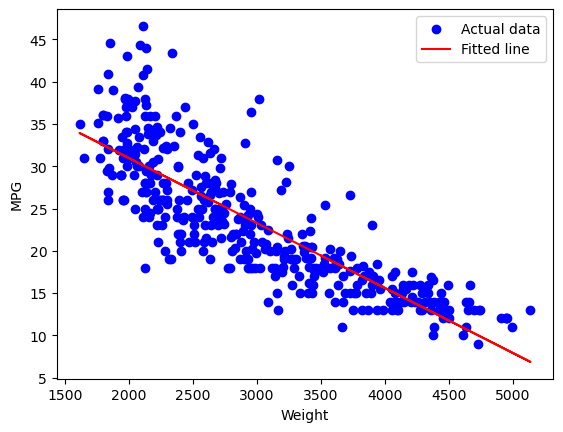

In [84]:
y_pred =model.predict(X)
r2=r2_score(y,y_pred)
mse=mean_squared_error(y,y_pred)
print(f"R2:",r2)
print(f"MSE:",mse)
plt.scatter(X,y,color='blue',label='Actual data')
plt.plot(X,y_pred,color='red',label='Fitted line')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.show()

## 3.4 Model evaluation

We already did some early model evaluating, but we can look for a better degree of our function to improve the model.

##### Question 6: Figure out what the best degree of the function is. Calculate the MSE for each degree on training and testing data and plot the values to figure out the best value. be careful of overfitting!

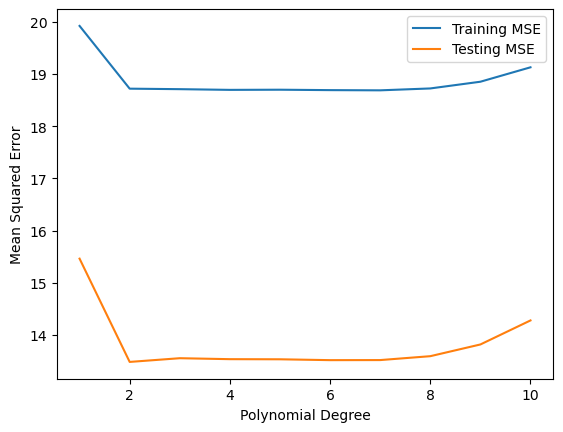

In [111]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
train_mse =[]
test_mse =[]
degrees =list(range(1,11))
for degree in degrees:
    ply=PolynomialFeatures(degree)
    X_train_poly =ply.fit_transform(X_train)
    X_test_poly =ply.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train) 
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

plt.plot(degrees, train_mse, label='Training MSE')
plt.plot(degrees, test_mse, label='Testing MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## 3.5 Excercises

##### Question 1: See section 3.3

##### Question 2: See section 3.3

##### Question 3: See section 3.3

##### Question 4: See section 3.3

##### Question 5: See section 3.3

##### Question 6: See section 3.5

##### Question 7: A new car just came on the market with a weight of 2071 pounds. What MPG can we expect of this car?

##### Question 8: Have another look at the heatmap from section 3.3. Can you spot another variable that might bring an improvement to the model? Figure out the best degree and retrain the model with 'weight' and the added variabele. Calculate $R^2$ and the MSE. Did the model improve?

##### Question 9: Figure out which columns give the best result. Retrain your models as many times as needed using different columns. figure out the best degree and calculate $R^2$ and the MSE. What is the best model you can achieve?

## Answer 7

In [109]:

optimal_degree = 2  #from 6 solution
poly = PolynomialFeatures(degree=optimal_degree)
X_poly_new = poly.fit_transform([[2071]])
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
mpg_prediction = model.predict(X_poly_new)
print(f"MPG for a car weighing 2071 pounds: {mpg_prediction[0]}")

MPG for a car weighing 2071 pounds: 31.270652381810955


## Answer 8

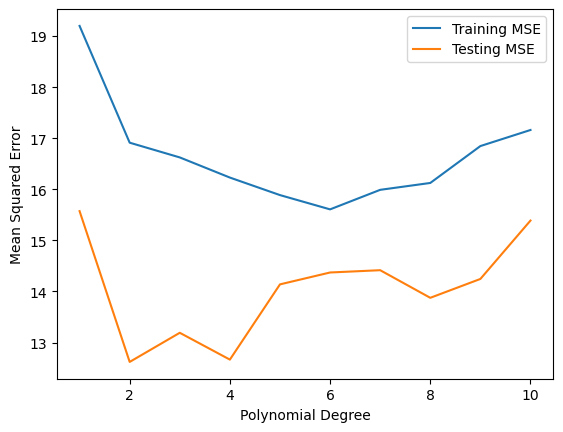

degree with 'weight' and 'horsepower' is: 2


In [110]:
new_variable ='horsepower'
X_combined = df[['weight',new_variable]]
X_train, X_test, y_train, y_test = train_test_split(X_combined, y,test_size =0.3,random_state =42)
train_mse = []
test_mse = []
degrees = list(range(1, 11)) 
for degree in degrees:
    poly =PolynomialFeatures(degree)
    X_train_poly =poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model =LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
plt.plot(degrees, train_mse, label='Training MSE')
plt.plot(degrees, test_mse, label='Testing MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

optimal_degree = degrees[test_mse.index(min(test_mse))]
print(f"degree with 'weight' and '{new_variable}' is: {optimal_degree}")


In [108]:
poly = PolynomialFeatures(degree=optimal_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [107]:

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"R^2 Training : {r2_train}")
print(f"MSE  Training : {mse_train}")
print(f"R^2  Testing : {r2_test}")
print(f"MSE Testing : {mse_test}")

R^2 Training : 0.7291793496529596
MSE  Training : 16.91301467387445
R^2  Testing : 0.780087708214569
MSE Testing : 12.621066361497185


## Answer 9 